In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
df = pd.read_csv('Social_Network_Ads.csv')
df.shape

(400, 5)

In [122]:
df = df.iloc[:,2:]

In [127]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
0,5,1000,0
1,90,25000,1


Train test Split

In [18]:
!pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.15.2-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.15.2-cp311-cp311-win_amd64.whl (41.2 MB)


In [19]:
from sklearn.model_selection import train_test_split

In [128]:
X_train,X_test,Y_train,Y_test = train_test_split(df.drop('Purchased',axis = 1),df['Purchased'],test_size = 0.3,random_state=0)

In [129]:
X_train.shape, X_test.shape

((282, 2), (121, 2))

Standard Scaler

In [130]:
from sklearn.preprocessing import StandardScaler

In [131]:
scaler = StandardScaler()

In [132]:
#i am fitting the data on the training set and this will be pass only on the training set
scaler.fit(X_train)
scaler.mean_

array([3.81489362e+01, 6.83404255e+04])

In [133]:
#transform train and test nets
#problem with this is that this will return the numpy array, although we had provided the program Pandas dataframe
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [134]:
X_train_scaled

array([[-0.65247311, -1.0188594 ],
       [ 1.90304656,  2.21510386],
       [-0.10486175,  2.03708754],
       [-0.65247311,  0.61295693],
       [-0.01359319, -0.27712471],
       [ 1.53797232,  1.82940182],
       [-1.10881591, -1.58257777],
       [ 0.80782385, -0.5441492 ],
       [ 1.35543521, -1.0188594 ],
       [ 0.99036097,  2.15576509],
       [ 1.72050944,  1.59204672],
       [ 1.99431512,  0.99865897],
       [-1.29135303, -1.46390022],
       [ 0.71655529,  0.58328754],
       [-0.37866743,  1.38436101],
       [-0.92627879, -0.27712471],
       [ 0.99036097, -0.87051246],
       [-0.74374167,  0.31626305],
       [ 0.80782385,  1.14700591],
       [ 0.62528673, -1.2562145 ],
       [-0.01359319, -0.5441492 ],
       [-0.28739887, -0.5441492 ],
       [-0.65247311,  0.16791611],
       [ 0.35148105,  0.34593244],
       [-0.19613031, -0.5441492 ],
       [-0.46993599,  2.39312019],
       [ 0.62528673,  0.31626305],
       [ 0.26021249,  0.10857733],
       [ 0.35148105,

In [135]:
#Converting the Numpy array into the Pandas data frame
X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)
X_train_scaled

,Age,EstimatedSalary
0,-0.652473,-1.018859
1,1.903047,2.215104
2,-0.104862,2.037088
3,-0.652473,0.612957
4,-0.013593,-0.277125
...,...,...
277,0.899092,-1.137537
278,-0.835010,-0.751835
279,-0.196130,-0.484810
280,-1.017547,-0.425472


In [136]:
X_train

,Age,EstimatedSalary
179,31,34000
219,59,143000
302,37,137000
49,31,89000
241,38,59000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [137]:
np.round(X_train.describe(),1)
#you can see that mean and standard deviation is changed in the scalled output

,Age,EstimatedSalary
count,282.0,282.0
mean,38.1,68340.4
std,11.0,33764.7
min,5.0,1000.0
25%,30.0,43000.0
50%,37.0,67000.0
75%,46.0,86000.0
max,90.0,150000.0


In [138]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,282.0,282.0
mean,0.0,-0.0
std,1.0,1.0
min,-3.0,-2.0
25%,-0.7,-0.8
50%,-0.1,-0.0
75%,0.7,0.5
max,4.7,2.4


Effect of the scaling

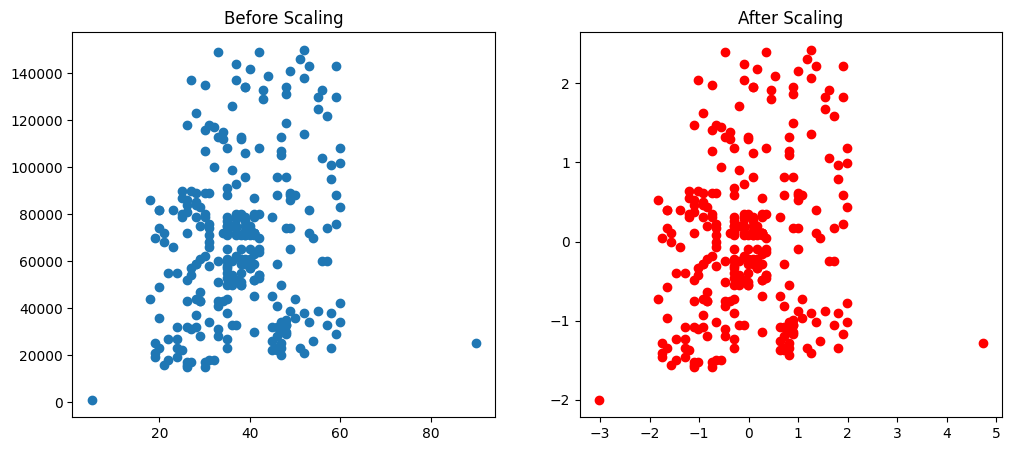

In [139]:
fig,(ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title('After Scaling')
plt.show()

#what is the difference
#data is remain the same it is just the scalled changed


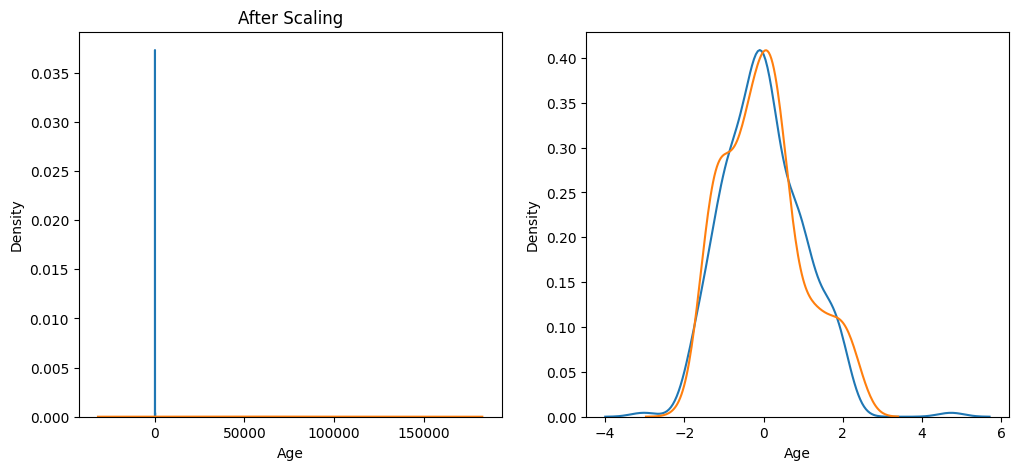

In [140]:
fig,(ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))

#before scalling probability density function
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)


ax1.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)

plt.show()

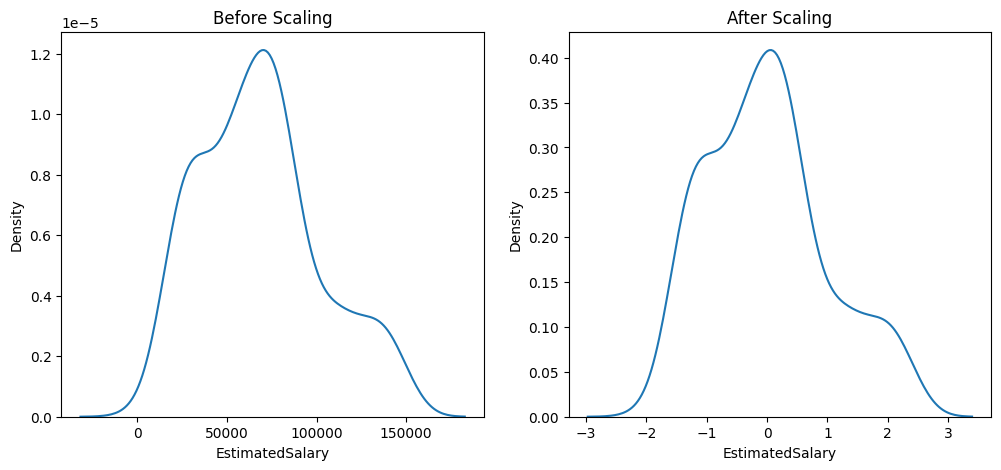

In [141]:
#Comparion of distribution individually
fig,(ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))
#before scalling probability density function
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)


ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)

plt.show()

In [142]:
#Why scalling is important?

In [58]:
from sklearn.linear_model import LogisticRegression

In [79]:
lr = LogisticRegression()
lr_scalled = LogisticRegression()

In [89]:
lr.fit(X_train,Y_train)
lr_scalled.fit(X_train_scaled,Y_train)

LogisticRegression()

In [90]:
Y_pred = lr.predict(X_test)
Y_pred_scaled = lr_scalled.predict(X_test_scaled)

In [62]:
from sklearn.metrics import accuracy_score

In [95]:
print(accuracy_score(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred_scaled))

0.8666666666666667
0.875


In [81]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
dt = DecisionTreeClassifier()
dt_scalled = DecisionTreeClassifier()

dt.fit(X_train,Y_train)
dt_scalled.fit(X_train_scaled,Y_train)


DecisionTreeClassifier()

In [99]:
Y_pred = dt.predict(X_test)
Y_pred_scaled = dt_scalled.predict(X_test_scaled)

In [100]:
print(accuracy_score(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred_scaled))

0.875
0.8666666666666667


#Effect of outlier

In [101]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [115]:
#Adding the outlier

outlier = pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,25000,30000],'Purchased':[0,1,1]})

In [117]:
outlier

,Age,EstimatedSalary,Purchased
0,5,1000,0
1,90,25000,1
2,95,30000,1


In [124]:
df = pd.concat([df,outlier])

In [125]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
0,5,1000,0
1,90,25000,1


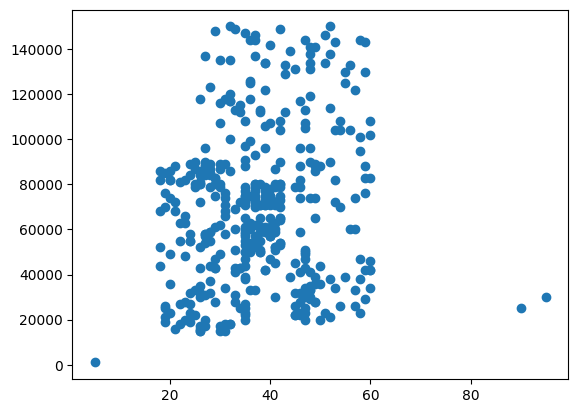

In [126]:
#our data has some outlier and you can show that here
plt.scatter(df['Age'],df['EstimatedSalary'])